---
format:
  html:
    other-links:
      - text: This notebook
        href: L18-19 Gaussian Quadrature.ipynb
---


# Gauss Quadrature

<div style='background-color: #ffe0b2; padding: 10px; border-left: 5px solid #ff9800;'><strong>Note.</strong>  These notes are mainly a record of what we discussed and are not a substitute for attending the lectures and reading books! If anything is unclear/wrong, let me know and I will update the notes.
 </div> 

Chapter 1: How computers add

* Week 1: L1: Introduction
* Week 2: L2 Floating point numbers, L3 Stability & Conditioning

Chapter 2: Solving nonlinear equations in 1d

* Week 3: L4 Solving nonlinear equations in 1d, L5 Exercises
* Week 4: L6-7 Solving nonlinear equations in 1d II & III

Chapter 3: Polynomial interpolation

* Week 5: L8 Polynomial Interpolation, L9 How to choose $X$? & Barycentric formula
* Week 6: L10 Hermite Interpolation, L11 Exercises

Chapter 4: Numerical Integration

* Week 7: L12 Newton-Cotes quadrature

---

* Week 8: L14 Revision, L15 Midterm Exam
* Week 9: L16-17 Group Project: Integrating Differential Equations

---

* Week 10: L18 Gaussian quadrature

Next - Chapter 5: Linear systems of equations 

<!-- * Weeks 11, 12, 13

Chapter 6: Approximation Theory

* Week 14, 15 -->

---

* December, 15 @10:30: Final Exam (Keller Hall 3-125)

In [2]:
include("preamble.jl");

✓ file included! 

using: Plots, LaTeXStrings, Polynomials, PrettyTables 

Functions included: 
    simple_iteration, 
    Newton, 
    orderOfConvergence, 
    ChebyshevNodes 

Use @doc <<function>> for help


## Previously...

Recall that we are considering *quadrature rules* of the following form:

\begin{align}
    \int_{a}^b f &\approx \sum_j w_j f(x_j). 
\end{align}

where $\{w_j\}$ are the *quadrature weights*, $\{x_j\}$ are the *quadrature nodes*, and $(\{w_j\}, \{x_j\})$ or $\sum_{j} w_j f(x_j)$ is a *quadrature rule*.

Suppose $p$ is the polynomial of degree $\leq n$ interpolating $f$ on $X = \{x_0,\dots,x_n \}$: that is $p(x) = \sum_{j=0}^n \ell_j(x) f(x_j)$. We simply approximate the integral of $f$ by instead integrating $p$:

\begin{align}
    \int_{a}^b f &\approx \int_a^b p = \sum_{j=0}^n \left[\int_a^b\ell_j(x)\mathrm{d}x \right] f(x_j) 
    %
    \tag{$\star$}
\end{align}

which gives a quadrature rule with weights $w_j := \int_a^b\ell_j(x)\mathrm{d}x$ and nodes $x_j$.

### Newton-Cotes 

When the interpolation nodes $\{x_0,\dots,x_n\}$ are equispaced, this is a *Newton-Cotes* quadrature rule.

We saw the following examples:

* Rectangular rule:

\begin{align}
    \int_a^b f \approx (b-a) f(a)
\end{align}

* Midpoint rule (from exam):

\begin{align}
    \int_a^b f \approx (b-a) f\big( \tfrac{a+b}2 \big)
\end{align}

* Trapezoid rule: 

\begin{align}
    \int_a^b f \approx \frac{a+b}{2} \left( f(a) + f(b) \right)
\end{align}

* Simpson's rule:

\begin{align}
    \int_a^b f \approx \frac{b-a}{6} \left( f(a) + 4 f\big( \tfrac{a+b}2 \big) + f(b) \right)
\end{align}

<div style='background-color: #ddff99; padding: 10px; border-left: 5px solid #009933;'><strong>Definition.</strong> 

We say the quadrature rule $(\{w_j\}, \{x_j\})$ is *exact for all polynomials of degree $N$* if 

\begin{align}
    \int_a^b p(x) \mathrm{d}x = \sum_{j=0}^n w_j p(x_j)
\end{align}

for all $p \in \mathcal P_N$ (all polynomials of degree $\leq N$).

</div> 

Let us consider the quadrature rule $(\star)$. For all polynomials $P$ of degree $\leq n$, we have 

\begin{align}
    \sum_{j=0}^n w_j P(x_j) &= \sum_{j=0}^n \left[ \int_a^b \ell_j(x) \mathrm{d}x\right] P(x_j) \\
    %
    &= \int_a^b \sum_{j=0}^n \ell_j(x) P(x_j) \mathrm{d}x \\
    %
    &= \int_a^b P
\end{align}

In the final line, we have used the fact that $P(x) = \sum_{j=0}^n \ell_j(x) P(x_j)$ beacuse $P$ has degree $\leq n$. That is, the Newton-Cotes quadrature rules given by $(\star)$ are exact for all polynomials of degree $n$.

Therefore: 

* Rectangular rule ($n=0$) is exact for all polynomials of degree $0$
* Trapezoid rule ($n=1$) is exact for all polynomials of degree $1$

You have also seen that: 

* Midpoint rule ($n=0$) is exact for all polynomials of degree $1$
* Simpson rule ($n=2$) is exact for all polynomials of degree $3$

This is a general fact: Suppose $n$ is even and $X = \{x_0, \dots, x_n\}$ is a set of interpolation nodes symmetric about $\frac{a+b}{2}$ (that is, $x_j + x_{n-j} = a+b$ ). Then, the quadrature rule $(\star)$ is exact for all polynomials of degree $n+1$.

Suppose we have the quadrature rule $(\star)$ with equispaced points $X = \{x_0,\dots,x_n\}$ and it is exact for all polynomials of degree $N$ ($N = n$ for odd $n$ and $N = n+1$ for even $n$). Let $P$ the polynomial interpolant of $f$ on $\tilde{X}$ such that $P$ has degree $N$ and $\tilde{X}$ contains $X$ (i.e. $P(x_j) = f(x_j)$ for all $j=0,\dots,n$). Then,  

\begin{align*}
    \left| \int_a^b f - \sum_{j=0}^n w_j f(x_j) \right| 
    %
    &= \left| \int_a^b (f - P ) \right| \\
    %
    &\leq \frac{\|f^{(N+1)}\|_{L^\infty([a,b])}}{(N+1)!} \int_a^b \left| \ell_{\tilde{X}}(x) \right| \mathrm{d}x  
\end{align*}

*Composite Rules.* Fix $K$ and define $h := \frac{b-a}{K}$. Then, split $[a,b]$ into the $K$ intervals $[a + kh, a + (k+1)h]$ for $k = 0,\dots,K-1$: 

\begin{align}
    \int_a^b f = \sum_{ k=0 }^{K-1} \int_{a + kh}^{a + (k+1)h} f
\end{align}

and apply the quadrature rule on each subinterval $[a + kh, a + (k+1)h]$. Using the error estimate on each sub-interval and summing over $k$, we saw that errors in the composite rules are as follows: 

* Rectangular: $O(h)$,
* Midpoint, Trapezoid: $O(h^2)$,
* Simpson: $O(h^4)$

## L18-19: Gaussian Quadrature

<div class='alert alert-block alert-danger'><b>Remark.</b> 

By considering the change of variables $y = \frac{2}{b-a} \left( x - \frac{a + b}{2} \right)$ and defining $\tilde{f}(y) = \frac{b-a}{2} f\big(  \tfrac{b-a}2 y + \tfrac{a+b}2  \big)$, we have

\begin{align}
    \int_a^b f(x) \mathrm{d}x = \int_{-1}^1 \tilde{f}(y) \mathrm{d}y. 
\end{align} 

Moreover, if $p$ is the polynomial interpolation of $f$ on $X \subset [a,b]$ then $\tilde{p}$ is the polynomial interpolation of $\tilde{f}$ on $\tilde{X} \subset [-1,1]$ where $\tilde{X} = \{ \frac{2}{b-a} \left( x - \frac{a + b}{2} \right) : x \in X \}$. As a result, we may without loss of generality consider the interval $[-1,1]$.

</div> 

Before: Fix $X$ find $\{w_j\}$ such that the quadrature rule

\begin{align}
    \int_a^b f \approx \sum_{j} w_j f(x_j)
\end{align}

is exact on $\mathcal P_n$ for maximal $n$.

**Idea:** Choose $X$ **and** $\{w_j\}$.

<div style='background-color: #cce0ff; padding: 10px; border-left: 5px solid #0066ff;'><strong>Example.</strong> 

Choose $w_0, w_1$ and $x_0, x_1$ such that 

\begin{align}
    \int_{-1}^1 f \approx w_0 f(x_0) + w_1 f(x_1)
\end{align}

is exact for all polynomials of degree $3 = 2n+1$.
</div> 

<div class='alert alert-block alert-success'><b>Answer.</b> 

Using the functions, $f = 1, x, x^2, x^3$, we want to solve

\begin{align}
    2 &= w_0 + w_1  \\
    0 &= w_0 x_0 + w_1 x_1 \\
    \frac{2}{3} &= w_0 x_0^2 + w_1 x_1^2 \\
    0 &= w_0 x_0^3 + w_1 x_1^3
\end{align}

We have 

\begin{align}
    0 &= ( w_0 x_0 + w_1 x_1 )( x_0 + x_1 ) \\
    &= (w_0 x_0^2 + w_1 x_1^2) + ( w_0 + w_1 ) x_0 x_1 \\
    &= \frac23 + 2 x_0 x_1
\end{align}

and so $x_0 x_1 = -\frac13$. Similarly, we have 

\begin{align}
    \frac23 (x_0 + x_1) &= ( w_0 x_0^2 + w_1 x_1^2 )( x_0 + x_1 ) \\
    &= (w_0 x_0^3 + w_1 x_1^3) + ( w_0 x_0 + w_1 x_1 ) x_0 x_1 \\
    &= 0 + 0 x_0 x_1 = 0
\end{align}

and so $x_0 = - x_1$ and $x_0 = - \frac{1}{\sqrt{3}}$, $x_1 = \frac{1}{\sqrt{3}}$.

Finally, we have $0 = w_0 x_0 + w_1 x_1 = (w_0 - w_1) x_0$ and so $w_0 = w_1 = 1$.

</div> 

The above example gives the quadrature rule

\begin{align}
    \int_{-1}^1 f \approx f\big( -\tfrac{\sqrt3}{3} \big) + f\big( \tfrac{\sqrt3}{3} \big)
\end{align}

which is exact for all polynomials of degree $\leq 3$.

Q: How to generalise this??

It turns out that one can choose the interpolation nodes and weights so that the quadrature rule 

\begin{align}
    \int_{-1}^1 f \approx \sum_{j=0}^n w_j f(x_j)
\end{align}

is exact for all polynomials of degree $2n+1$. The solution in the general case requires a set of *orthogonal polynomials*:  

## Legendre Polynomials

<div style='background-color: #ddff99; padding: 10px; border-left: 5px solid #009933;'><strong>Definition.</strong> 

Let the *Legendre polynomial $P_n$* be the *monic* polynomial of degree $n$ such that 

\begin{align}
    (P_n, q)_{L^2} := \int_{-1}^1 P_n(x) q(x) \mathrm{d}x = 0
\end{align}

for all $q \in P_{n-1}$. 

</div> 

<div class='alert alert-block alert-danger'><b>Remark.</b> 

We say that $f$ is orthogonal to $g$ if $(f,g)_{L^2} = 0$.

</div> 

<div class='alert alert-block alert-danger'><b>Remark (An equivalent definition).</b> 

$P_n$ is monic and $(P_n, P_m) = 0$ for all $n \not= m$.

</div> 


It may not be immediately clear that such polynomials exist, but we may compute the first few explicitly:

<div style='background-color: #cce0ff; padding: 10px; border-left: 5px solid #0066ff;'><strong>Example.</strong> 

When $n=0$, there is only one monic polynomial: $P_0(x) = 1$,

When $n=1$, we require $P_1(x) = x + a$ to satisfy

\begin{align}
    0 = \int_{-1}^1 P_1(x) 1 \mathrm{d}x = 2 a
\end{align} 

and so $P_1(x) = x$.

When $n=2$, we have $P_2(x) = x^2 + a x + b$ and so 

\begin{align}
    0 &= \int_{-1}^1 P_2(x) 1 \mathrm{d}x = 2b + \frac23 \\
    0 &= \int_{-1}^1 P_2(x) x \mathrm{d}x = \frac{2a}3 
\end{align}

therefore $P_2(x) = x^2 - \frac13$.

</div> 

<div class='alert alert-block alert-info'><b>Theorem.</b> 

The Legendre polynomials exist for all $n$.

</div> 

(we will come back to the proof)

<div class='alert alert-block alert-danger'><b>Remark.</b> 

The roots of $P_2$ are $\{ -\tfrac{\sqrt3}{3}, \tfrac{\sqrt3}{3} \}$ (which are the nodes used in the quadrature rule we had above)

</div> 

Recall $P_n$ are the Legendre polynomials and define the set of *Legendre points* $X$ by 

\begin{align}
    X := \{ \text{zeros of } P_{n+1} \}.
\end{align}

<div class='alert alert-block alert-info'><b>Claim.</b>  

* $X$ is a set of $n+1$ distinct points in $[-1,1]$

</div> 

<div class='alert alert-block alert-success'><b>Proof.</b> 

Notice that $P_{n+1}(x) = \prod_{j=0}^n(x-x_j)$ (i.e. the monic polynomial with roots $X$). 

Suppose that $x_0 = x_1$ and define $q(x) := \prod_{j=2}^n (x - x_j)$. Then, since $P_{n+1}$ is orthogonal to $q$ (as $q$ is of degree $n-1$), we have 

\begin{align}
    0 &= \int_{-1}^1 P_{n+1}(x) q(x) \mathrm{d}x \\
    %
    &= \int_{-1}^1 \left(\prod_{j=0}^n (x - x_j) \right) \left( \prod_{j=2}^n (x - x_j) \right) \mathrm{d}x \\
    %
    &= \int_{-1}^1 (x - x_0)^2 \prod_{j=2}^n (x - x_j)^2 \mathrm{d}x >0,
\end{align}

a contradiction (the integral of a non-negative polynomial on a positive interval is positive). By relabeling the indices in $X = \{x_0,\dots,x_n\}$, we see that $X$ is a set of pairwise distinct nodes.

Suppose $x_k \not\in [-1,1]$. Then, on defining $q(x) := \prod_{j=0 \,:\, j \not= k }^n (x - x_j)$, a polynomial of degree $n$, we have 

\begin{align}
    0 &= \int_{-1}^1 P_{n+1}(x) q(x) \mathrm{d}x \\
    %
    &= \int_{-1}^1 \left(\prod_{j=0}^n (x - x_j) \right) \left( \prod_{j\not=k} (x - x_j) \right) \mathrm{d}x \\
    %
    &= \int_{-1}^1 (x - x_k) \prod_{j\not=k} (x - x_j)^2 \mathrm{d}x.
\end{align}

Now, since $x_k \not\in [-1,1]$, we have $(x - x_k)$ is either strictly positive or negative for $x \in [-1,1]$. Therefore, $\int_{-1}^1 (x - x_k) \prod_{j\not=k} (x - x_j)^2\mathrm{d}x$ is either strictly positive or negative, a contradiction. As a result, each $x_k$ is in the interval $[-1,1]$.

</div> 

<div style='background-color: #ddff99; padding: 10px; border-left: 5px solid #009933;'><strong>Definition (Gaussian Quadrature) </strong> 

Let $p$ be the polynomial interpolation of $f$ on the $n+1$ Legendre points. Then, we may define the quadrature rule

\begin{align}
    \int_{-1}^1 f \approx \int_{-1}^{1} p = \sum_{j=0}^n w_j f(x_j)
\end{align}

</div>

<div class='alert alert-block alert-info'><b>Theorem.</b> 

Gaussian quadrature is exact for polynomials of degree $2n+1$.

</div> 

<div class='alert alert-block alert-success'><b>Proof.</b> 

First, note that we have already seen that Gaussian quadrature is exact for all polynomials of degree $n$.

Let $X = \{x_0,\dots,x_n\}$ be the zeros of $P_{n+1}$, $w_j$ the corresponding quadrature nodes, and let $P$ be a polynomial of degree $2n+1$. On dividing $P$ by $P_{n+1}$, there exists $q_n, r_n \in \mathcal P_n$ such that 

\begin{align}
    P(x) = P_{n+1}(x) q_n(x) + r_n(x).
\end{align}

Notice that $P(x_j) = P_{n+1}(x_j) q_n(x_j) + r_n(x_j) = r_n(x_j)$ so that $r_n$ is a degree $n$ polynomial interpolant of $P$ on $X$. Using this, combined with the fact that $P_{n+1}$ is orthogonal to $q_n$, we have 

\begin{align}
    \int_{-1}^1 P &= \int_{-1}^{1} \left[ P_{n+1}(x) q_n(x) + r_n(x) \right] \mathrm{d}x
    \\
    &= 0 + \int_{-1}^{1} r_n(x) \mathrm{d}x \\
    %
    &= \sum_{j=0}^n w_j r_n(x_j)  \\
    %
    &= \sum_{j=0}^n w_j P(x_j) 
    % 
\end{align}

Therefore, Gaussian quadrature is exact for all polynomials of degree $\leq 2n+1$.

</div> 

<div class='alert alert-block alert-info'><b>Claim.</b>  

* $\sum_{j=0}^n w_j = 2$
* $w_j \geq 0$, 

</div> 

<div class='alert alert-block alert-success'><b>Proof.</b> 

Notice that $\sum_{k=0}^n \ell_k(x)$ is a polynomial of degree $n$ which is equal to $1$ on the set of $n+1$ points $X$ and so $\sum_{k=0}^n \ell_k(x)= 1$ for all $x$. Therefore, because the quadrature rule is exact for polynomials of degree $2n+1$, we have

\begin{align}
    2 &= \int_{-1}^1 \mathrm{d}x \\
    &= \int_{-1}^1 \sum_{k=0}^n \ell_k(x) \mathrm{d}x \\
    &= \sum_{j=0}^n w_j \left[  \sum_{k=0}^n \ell_j(x_k) \right] \\
    &= \sum_{j=0}^n w_j.
\end{align}

Moreover, $\ell_k(x)^2$ is a polynomial of degree $2n$ and the quadrature rule is exact for all polynomials of degree $2n +1$, we have 

\begin{align}
    0 &\leq \int_{-1}^1 \ell_k(x)^2 \mathrm{d}x \\
    &= \sum_j w_j \left[ \ell_k(x_j)^2 \right] \\
    &= w_j 
\end{align} 

Therefore, the weights are positive and sum to $2 = \int_{-1}^1 1 \mathrm{d}x$.

</div> 

<div class='alert alert-block alert-info'><b>Theorem.</b> 

The Legendre polynomials $P_n$ exist.

</div> 

<div class='alert alert-block alert-success'><b>Proof. (Presentation)  </b> 

We will use the notation

\begin{align}
    \|f\|_{L^2} := \left( \int_{-1}^1 |f(x)|^2 \mathrm{d}x \right)^{1/2}.
\end{align}

Let $p_0 = 1$ and $p_1 = x$. 

If $p_0, p_1, \dots, p_n$ have been defined, we define 

\begin{align}
    a_n &:= \frac{ \int_{-1}^1 x p_{n}(x)^2 \mathrm{d}x }{\|p_{n}\|_{L^2}^2} \qquad \text{and}\\
     b_{n} &:= \frac{ \int_{-1}^1 x p_{n}(x) p_{n-1}(x) \mathrm{d}x }{\|p_{n-1}\|_{L^2}^2}
\end{align}

and thus $p_{n+1}(x) := (x - a_n) p_n(x) - b_n p_{n-1}(x)$ for all $n \geq 1$.

We claim that $p_n(x)$ is the $n^\text{th}$ Legendre polynomial. We prove this by induction: the statement is true for $n=0$ and $n=1$. Suppose the statement is true for $n$. 

Then, notice that $p_{n+1}(x)$ is a monic polynomial of degree $n+1$.

Moreover, we have: for all $j < n-1$,

\begin{align}
    \int_{-1}^1 p_{n+1}(x) p_{j}(x) \mathrm{d}x
    %
    &= \int_{-1}^1 \left[ (x - a_n) p_{n}(x) - b_n p_{n-1} \right] p_j(x) 
    \mathrm{d}x \\
    %
    &= \int_{-1}^1 p_{n}(x) \left[ (x - a_n) p_j(x) \right] - b_n \int_{-1}^1 p_{n-1} p_j \\
    %
    &= 0.
\end{align}

Here, we have used the fact that $(x-a_n) p_j$ is a polynomial of degree $j+1 < n$, $p_j$ is a polynomial of degree $j < n-1$, and $p_n$ is the $n^\text{th}$ Legendre polynomial.

Moreover, we have 

\begin{align}
    \int_{-1}^1 p_{n+1}(x) p_{n-1}(x) \mathrm{d}x
    %
    &= \int_{-1}^1 \left[ (x - a_n) p_{n}(x) - b_n p_{n-1} \right] p_{n-1}(x) 
    \mathrm{d}x \\
    %
    &= \int_{-1}^1 x p_{n}(x) p_{n-1}(x) - b_n \int_{-1}^1 | p_{n-1}(x) |^2 \mathrm{d}x \\
    %
    &= 0
\end{align}

and

\begin{align}
    \int_{-1}^1 p_{n+1}(x) p_{n}(x) \mathrm{d}x
    %
    &= \int_{-1}^1 \left[ (x - a_n) p_{n}(x) - b_n p_{n-1} \right] p_{n}(x) 
    \mathrm{d}x \\
    %
    &= \int_{-1}^1 (x - a_n) p_{n}(x) p_{n}(x)  \\
    %
    &= 0
\end{align}

As a result, we have $p_{n+1}$ is monic and orthogonal to all polynomials of degree $\leq n$.

</div> 

We may use the recursion in the proof to compute the Legendre polynomials: here we plot $P_n$ for $n \leq 8$ and the set of Legendre points 

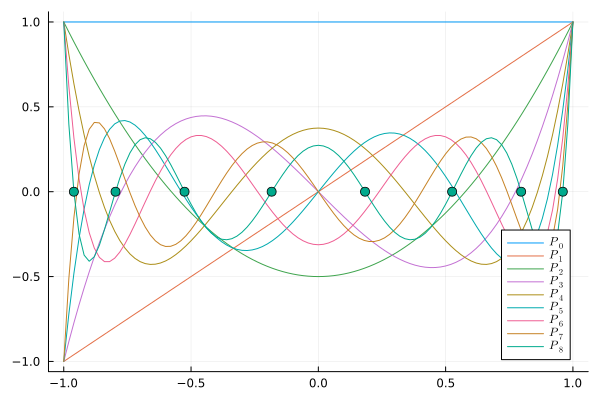

In [3]:
# | echo: false

function Legendre( n ) 
    x = Polynomial([0,1])
    m = n-1
    if (n==0)
        return Polynomial([1])
    elseif (n==1)
        return x
    else
        return ( (2m+1) * x * Legendre(m) - m * Legendre(m-1) )/(m+1)
    end
end

plot( Legendre(0), -1,1, label=L"P_0" )
plot!(Legendre(1), -1,1, label=L"P_1" )
plot!(Legendre(2), -1,1, label=L"P_2" )
plot!(Legendre(3), -1,1, label=L"P_3" )
plot!(Legendre(4), -1,1, label=L"P_4" )
plot!(Legendre(5), -1,1, label=L"P_5" )
plot!(Legendre(6), -1,1, label=L"P_6" )
plot!(Legendre(7), -1,1, label=L"P_7" )
plot!(Legendre(8), -1,1, label=L"P_8" )

p = Legendre(8)
r = roots(p)
scatter!( r, p.(r), markersize=5, primary=false )

Next we approximate the integral 

\begin{align}
    \int_{-1}^{+1} \frac{1}{1 + e^{10(x - 0.5)}} \mathrm{d}x
\end{align}

by using *(i)* the composite trapezoid rule, *(ii)* composite simpson rule (from last time) and *(iii)* using Newton quadrature. 

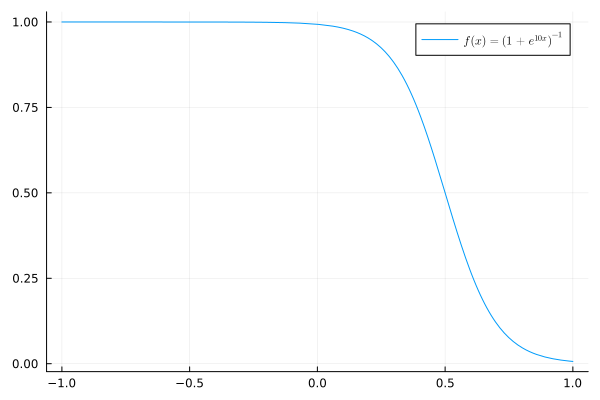

In [6]:
# | echo: false 

a, b = -1, 1
f = x -> 1/( 1 + exp( 10*(x-.5) ))
df_max = 5/2
d2f_max = 50/(3*sqrt(3))
d3f_max = 125/3

exact = (5 + log( 1 - exp(5) + exp(10) ) ) / 10

plot(f, a, b, label=L"f(x) = (1 + e^{10x})^{-1}")


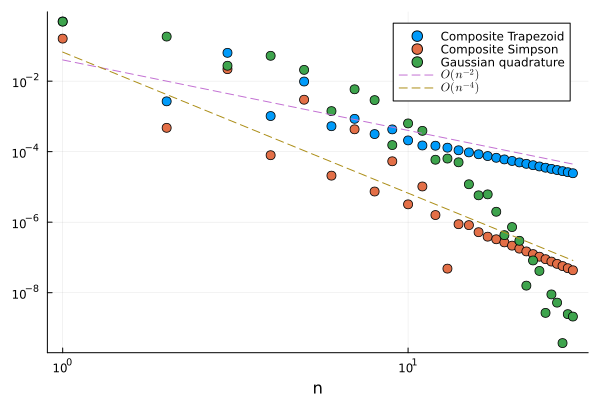

In [ ]:
# | echo: false 

N = 30
T = []  # Composite trapezoid rule 
S = []  # Simpson
G = []  # Gaussian rule

for n ∈ 1:N
    
    h = (b-a)/n
    x = [a + j*(b-a)/n for j in 0:n]
    push!( T, sum( [ (1/2)*( x[j+1] - x[j] ) * ( f(x[j]) + f(x[j+1]) ) for j in 1:n] ) )
      
    h = (b-a)/(2*n)
    y = [a + j*(b-a)/(2*n) for j in 0:(2*n)]
    
    p = 0
    for j in 0:2*n
        if j==0
            p = p + f( y[j+1] )
        elseif j==2*n 
            p = p + f( y[j+1] )
        elseif mod(j,2)==0
            p = p + 2*f( y[j+1] )
        else
            p = p + 4*f( y[j+1] )
        end
    end
    push!( S, h*p/3 )

    r = roots( Legendre(n) )
    p = fit( r, f.(r) )
    I = integrate( p )
    push!( G, I(1) - I(-1) )

end

scatter( abs.(T .- exact ), xlabel=L"n", xaxis=:log, yaxis=:log, markersize=5, label="Composite Trapezoid" )
scatter!( abs.(S .- exact), markersize=5, label="Composite Simpson")

scatter!( abs.(G .- exact ), markersize=5, label="Gaussian quadrature" )

#plot!( (1/12)*d2f_max*(b-a)^3*(1:N).^(-2), linestyle=:dash, label="error bound (Trapezoid)" )
plot!( (1/25)*(1:N).^(-2), linestyle=:dash, label=L"O(n^{-2})" ) 
#plot!( (1/(27))*d3f_max*(b-a)^4*(1:N).^(-3), linestyle=:dash, color=:red, label="error bound (Simpson)" )
plot!( (1/15)*(1:N).^(-4), linestyle=:dash, label=L"O(n^{-4})" )
# plot!( (1/2880)*d4f_max*(b-a)^5*(1:N).^(-4), linestyle=:dash, label="n^{-4}" )


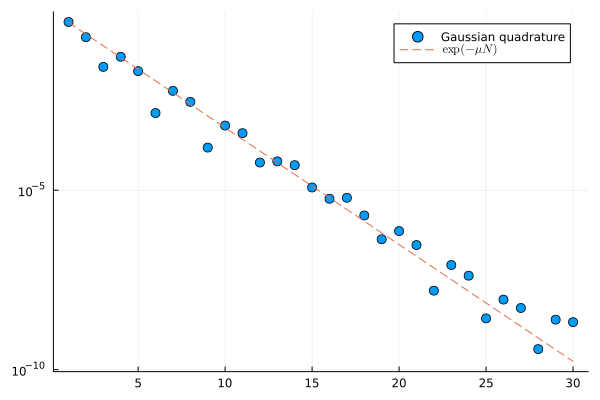

In [5]:
# | echo: false 

scatter( abs.(G .- exact ), yaxis=:log, markersize=5, label="Gaussian quadrature" )
plot!( exp.(-(1:N)* 3/4 ), linestyle=:dash, label=L"\exp( - μ N )" )

## Error estimate for $n=1$ 

We have $X = \{x_0, x_1\} = \{ -\frac{\sqrt3}{3}, \frac{\sqrt3}3 \}$. Quadrature in these points is exact for all polynomials of degree $2(1) + 1 = 3$. We therefore let $p$ be the polynomial of degree $3$ such that $p(x_j) = f(x_j)$ and $p'(x_j) = f'(x_j)$ for $j=0,1$ and notice that the error is 

\begin{align}
    &\left| \int_{-1}^1 f - \left( f(x_0) + f(x_1) \right) \right| \\
    %
    &= \left| \int_{-1}^1 f - \left( p(x_0) + p(x_1) \right) \right| \\
    %
    &= \left| \int_{-1}^1 (f - p) \right|.
\end{align}

Since $p$ is the Hermite polynomial interpolant on $\{\{ x_0, x_0, x_1, x_1 \}\}$, there exists $\xi_x$ such that $f(x) - p(x) = \frac{f^{(4)}(\xi_x)}{4!} (x-x_0)^2 (x-x_1)^2$ [this is the generalisation of the Taylor remainder theorem we saw when we were considering Hermite interpolation]. Therefore, using the mean value theorem, there exists $\xi \in [-1,1]$ such that 

\begin{align}
    &\left| \int_{-1}^1 (f - p) \right|  \\ 
    &= \left| \frac{f^{(4)}(\xi)}{4!} \right| \int_{-1}^1 (x-x_0)^2 (x-x_1)^2  \mathrm{d}x \\
    &= \frac{8}{45} \frac{1}{4!} \left| f^{(4)}(\xi) \right| \\
    &=  \frac{1}{135} \left| f^{(4)}(\xi) \right|.
\end{align}


<div style='background-color: #cce0ff; padding: 10px; border-left: 5px solid #0066ff;'><strong>Example.</strong> 

Approximate $\log 2 = \int_1^2 \frac{1}{x} \mathrm{d}x$ using Gauss quadrature and evaluate an upper bound for the error.

</div> 

<div class='alert alert-block alert-success'><b>Answer.</b> 

First notice that 

\begin{align}
    \log 2 &= \int_1^2 \frac1x \mathrm{d}x \\
    %
    &= \frac{1}{2} \int_{-1}^1 \frac1{ \frac{1}2 x + \frac32 } \mathrm{d}x \\
    %
    &= \int_{-1}^1 \frac1{ 3 + x } \mathrm{d}x \\
    %
    &\approx \frac1{ 3 - \frac{\sqrt{3}}3 } + \frac1{ 3 + \frac{\sqrt{3}}3 } \\
    %
    &= \frac9{13}
\end{align}

The error here is $\log 2 - \tfrac{9}{13} \approx 8.39 \times 10^{-4}$. 

The error is $\frac{1}{135}  f^{(4)}(\xi)$ where $f(x) = \frac{1}{3+x}$ and $\xi$ is some point in $[-1,1]$. Taking derivatives of $f$, we find that $f^{(4)}(x) =  \frac{24}{(3+x)^5}$ and so we actually have the error between $\log 2$ and the approximation using Gauss quadrature with $n=1$ is 

\begin{align}
     \log 2 - \left( \frac1{ 3 - \frac{\sqrt{3}}3 } + \frac1{ 3 + \frac{\sqrt{3}}3 } \right)
\end{align}

and belongs to $[\frac{24}{135} \min_{x\in [-1,1]} (3+x)^{-5}, \frac{24}{135} \max_{x\in [-1,1]} (3+x)^{-5}] = [ \frac1{5760}, \frac{1}{180} ] \supset [ 1.74 \times 10^{-4}, 5.55 \times 10^{-3} ]$. The actual error belongs to this interval!

</div> 

<div class='alert alert-block alert-warning'><b>Exercise.</b> 

Compare this to rectangular and its composite rule with 2 sub-intervals and the trapezoid and Simpson rules. 

</div> 


## Error estimates 

If $w_j \geq 0$ and the quadrature rule is exact for all polynomials of degree $N$ (this is true for Composite Trapezoid rule with $N = 1$ and Gaussian quadrature with $N = 2n+1$), then

\begin{align}
    &\left| \int_{-1}^1 f - \sum_{j=0}^n w_j f(x_j) \right| \\
    %
    &= \min_{q \in \mathcal P_{N}}\left| \int_{-1}^1 (f - q) - \sum_{j=0}^n w_j \left( f(x_j) - q(x_j)\right)  \right| \\
    %
    &\leq 4  \min_{q \in \mathcal P_{N}} \left\| f - q \right\|_{L^\infty([-1,1])}
\end{align}

*c.f.* Approximation theory [we will come back this this].

## How to compute the roots of $P_{n+1}$?

Recall, $P_0(x) = 1, P_1(x) = x$, and 

\begin{align}
    xP_n(x) = a_n P_n(x) + P_{n+1}(x) + b_n P_{n-1}(x)
\end{align}

It turns out that that $X = \{ \text{zeros of } P_{n+1} \}$ is the set of eigenvalues of a tridiagonal matrix $T$ (see: Assignment 7). Next chapter, we will see methods for finding the eigenvalues of this matrix!